<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/Pytorch_EBMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HopfieldNetwork

### Training

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from tqdm import tqdm

# Define your dataset
train_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

# Create a DataLoader
data_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Define the number of epochs
num_epochs = 100


def calculate_loss(initial_state, updated_state, model):
    initial_energy = model.energy(initial_state)
    updated_energy = model.energy(updated_state)
    return torch.mean(updated_energy - initial_energy)  # CD loss


# Define your Hopfield network model
class HopfieldNetwork(nn.Module):
    def __init__(self, num_neurons):
        super(HopfieldNetwork, self).__init__()
        self.weights = nn.Parameter(torch.zeros(num_neurons, num_neurons))

    def energy(self, state):
        # Reshape state to a 2D matrix (squeeze the middle dimension)
        state = state.squeeze(1)
        # Perform matrix multiplications in the correct order
        return -0.5 * torch.mm(state, torch.mm(self.weights, state.t()))

    def forward(self, state):
        # Vectorized update rule
        flattened_state = state.view(state.size(0), -1)
        activation = torch.matmul(flattened_state, self.weights.t())
        updated_state = torch.sign(activation)
        return updated_state

# Example usage
model = HopfieldNetwork(num_neurons=784)  # 784 for MNIST images
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop with tqdm progress bar and CD
for epoch in range(num_epochs):
    epoch_energy = 0
    epoch_loss = 0
    with tqdm(data_loader, unit="batch") as tepoch:
        for batch_idx, (data, target) in enumerate(tepoch):
            tepoch.set_description(f"Epoch {epoch+1}")
            optimizer.zero_grad()

            # Flatten the input data
            data = data.view(data.size(0), -1)

            # Initial state
            initial_state = data

            # Update the state using the model
            states = model(data)

            energy = model.energy(states)
            mean_energy = torch.mean(energy)
            epoch_energy += mean_energy.item()

            # Calculate the contrastive divergence loss
            loss = calculate_loss(initial_state, states, model)
            epoch_loss += loss.item()
            loss.backward()
            optimizer.step()
            tepoch.set_postfix(loss=loss.item())

    # Print average energy and loss for the epoch
    avg_epoch_energy = epoch_energy / len(data_loader)
    avg_epoch_loss = epoch_loss / len(data_loader)
    print(f"Epoch {epoch+1}: Average Energy = {avg_epoch_energy:.4f}, Average Loss = {avg_epoch_loss:.4f}")

Epoch 1: 100%|██████████| 938/938 [00:36<00:00, 25.95batch/s, loss=-2.35e+5]


Epoch 1: Average Energy = -115717.3233, Average Loss = -113303.9445


Epoch 2: 100%|██████████| 938/938 [00:36<00:00, 25.76batch/s, loss=-4.76e+5]


Epoch 2: Average Energy = -362557.7712, Average Loss = -355315.5524


Epoch 3: 100%|██████████| 938/938 [00:36<00:00, 25.73batch/s, loss=-7.15e+5]


Epoch 3: Average Energy = -605625.5763, Average Loss = -593548.8868


Epoch 4: 100%|██████████| 938/938 [00:35<00:00, 26.07batch/s, loss=-9.48e+5]


Epoch 4: Average Energy = -847323.4711, Average Loss = -830399.0227


Epoch 5: 100%|██████████| 938/938 [00:35<00:00, 26.69batch/s, loss=-1.19e+6]


Epoch 5: Average Energy = -1088620.6201, Average Loss = -1066868.5833


Epoch 6: 100%|██████████| 938/938 [00:36<00:00, 25.99batch/s, loss=-1.42e+6]


Epoch 6: Average Energy = -1329789.5901, Average Loss = -1303196.8361


Epoch 7: 100%|██████████| 938/938 [00:35<00:00, 26.09batch/s, loss=-1.65e+6]


Epoch 7: Average Energy = -1570904.8045, Average Loss = -1539472.0880


Epoch 8: 100%|██████████| 938/938 [00:35<00:00, 26.67batch/s, loss=-1.9e+6]


Epoch 8: Average Energy = -1812000.7769, Average Loss = -1775733.1157


Epoch 9: 100%|██████████| 938/938 [00:36<00:00, 25.90batch/s, loss=-2.13e+6]


Epoch 9: Average Energy = -2053084.7933, Average Loss = -2011990.0071


Epoch 10: 100%|██████████| 938/938 [00:35<00:00, 26.11batch/s, loss=-2.36e+6]


Epoch 10: Average Energy = -2294213.6378, Average Loss = -2248267.1234


Epoch 11: 100%|██████████| 938/938 [00:35<00:00, 26.61batch/s, loss=-2.61e+6]


Epoch 11: Average Energy = -2535341.4038, Average Loss = -2484556.4680


Epoch 12: 100%|██████████| 938/938 [00:35<00:00, 26.11batch/s, loss=-2.84e+6]


Epoch 12: Average Energy = -2776461.8228, Average Loss = -2720842.5757


Epoch 13: 100%|██████████| 938/938 [00:36<00:00, 26.03batch/s, loss=-3.07e+6]


Epoch 13: Average Energy = -3017587.0877, Average Loss = -2957134.3705


Epoch 14: 100%|██████████| 938/938 [00:35<00:00, 26.11batch/s, loss=-3.32e+6]


Epoch 14: Average Energy = -3258718.9579, Average Loss = -3193434.5248


Epoch 15: 100%|██████████| 938/938 [00:35<00:00, 26.42batch/s, loss=-3.55e+6]


Epoch 15: Average Energy = -3499844.6557, Average Loss = -3429706.0490


Epoch 16: 100%|██████████| 938/938 [00:36<00:00, 25.89batch/s, loss=-3.78e+6]


Epoch 16: Average Energy = -3740963.3678, Average Loss = -3665998.6623


Epoch 17: 100%|██████████| 938/938 [00:36<00:00, 25.91batch/s, loss=-4.02e+6]


Epoch 17: Average Energy = -3982098.7700, Average Loss = -3902282.8569


Epoch 18: 100%|██████████| 938/938 [00:35<00:00, 26.60batch/s, loss=-4.24e+6]


Epoch 18: Average Energy = -4223166.7215, Average Loss = -4138514.9659


Epoch 19: 100%|██████████| 938/938 [00:36<00:00, 26.00batch/s, loss=-4.5e+6]


Epoch 19: Average Energy = -4464174.3294, Average Loss = -4374694.3252


Epoch 20: 100%|██████████| 938/938 [00:36<00:00, 26.02batch/s, loss=-4.72e+6]


Epoch 20: Average Energy = -4705193.3731, Average Loss = -4610872.0192


Epoch 21: 100%|██████████| 938/938 [00:35<00:00, 26.47batch/s, loss=-4.96e+6]


Epoch 21: Average Energy = -4946203.5938, Average Loss = -4847033.1823


Epoch 22: 100%|██████████| 938/938 [00:35<00:00, 26.30batch/s, loss=-5.19e+6]


Epoch 22: Average Energy = -5187216.6493, Average Loss = -5083212.9867


Epoch 23: 100%|██████████| 938/938 [00:36<00:00, 26.03batch/s, loss=-5.43e+6]


Epoch 23: Average Energy = -5428230.2180, Average Loss = -5319374.9861


Epoch 24: 100%|██████████| 938/938 [00:35<00:00, 26.16batch/s, loss=-5.67e+6]


Epoch 24: Average Energy = -5669241.1610, Average Loss = -5555578.6226


Epoch 25: 100%|██████████| 938/938 [00:35<00:00, 26.60batch/s, loss=-5.92e+6]


Epoch 25: Average Energy = -5910252.3289, Average Loss = -5791769.5912


Epoch 26: 100%|██████████| 938/938 [00:36<00:00, 25.97batch/s, loss=-6.15e+6]


Epoch 26: Average Energy = -6151277.4472, Average Loss = -6027924.9648


Epoch 27: 100%|██████████| 938/938 [00:35<00:00, 26.16batch/s, loss=-6.38e+6]


Epoch 27: Average Energy = -6392284.0208, Average Loss = -6264132.5853


Epoch 28: 100%|██████████| 938/938 [00:35<00:00, 26.76batch/s, loss=-6.63e+6]


Epoch 28: Average Energy = -6633296.7788, Average Loss = -6500284.6557


Epoch 29: 100%|██████████| 938/938 [00:36<00:00, 26.05batch/s, loss=-6.87e+6]


Epoch 29: Average Energy = -6874315.7639, Average Loss = -6736472.9654


Epoch 30: 100%|██████████| 938/938 [00:35<00:00, 26.10batch/s, loss=-7.08e+6]


Epoch 30: Average Energy = -7115328.2015, Average Loss = -6972620.4872


Epoch 31: 100%|██████████| 938/938 [00:35<00:00, 26.72batch/s, loss=-7.31e+6]


Epoch 31: Average Energy = -7356341.4350, Average Loss = -7208812.3300


Epoch 32: 100%|██████████| 938/938 [00:36<00:00, 25.95batch/s, loss=-7.53e+6]


Epoch 32: Average Energy = -7597354.8225, Average Loss = -7444970.8657


Epoch 33: 100%|██████████| 938/938 [00:36<00:00, 26.04batch/s, loss=-7.8e+6]


Epoch 33: Average Energy = -7838363.9190, Average Loss = -7681179.1748


Epoch 34: 100%|██████████| 938/938 [00:35<00:00, 26.30batch/s, loss=-8e+6]


Epoch 34: Average Energy = -8079379.0235, Average Loss = -7917312.9478


Epoch 35: 100%|██████████| 938/938 [00:35<00:00, 26.10batch/s, loss=-8.27e+6]


Epoch 35: Average Energy = -8320391.5235, Average Loss = -8153527.6407


Epoch 36: 100%|██████████| 938/938 [00:36<00:00, 25.84batch/s, loss=-8.5e+6]


Epoch 36: Average Energy = -8561390.8145, Average Loss = -8389646.1290


Epoch 37: 100%|██████████| 938/938 [00:36<00:00, 26.05batch/s, loss=-8.76e+6]


Epoch 37: Average Energy = -8802382.9712, Average Loss = -8625864.0437


Epoch 38: 100%|██████████| 938/938 [00:35<00:00, 26.41batch/s, loss=-8.95e+6]


Epoch 38: Average Energy = -9043378.1674, Average Loss = -8861973.2271


Epoch 39: 100%|██████████| 938/938 [00:36<00:00, 25.86batch/s, loss=-9.21e+6]


Epoch 39: Average Energy = -9284382.2292, Average Loss = -9098134.0203


Epoch 40: 100%|██████████| 938/938 [00:36<00:00, 25.86batch/s, loss=-9.45e+6]


Epoch 40: Average Energy = -9525377.8934, Average Loss = -9334318.4243


Epoch 41: 100%|██████████| 938/938 [00:35<00:00, 26.51batch/s, loss=-9.69e+6]


Epoch 41: Average Energy = -9766377.7260, Average Loss = -9570434.7633


Epoch 42: 100%|██████████| 938/938 [00:36<00:00, 25.87batch/s, loss=-9.91e+6]


Epoch 42: Average Energy = -10007376.4382, Average Loss = -9806651.4787


Epoch 43: 100%|██████████| 938/938 [00:36<00:00, 25.79batch/s, loss=-1.02e+7]


Epoch 43: Average Energy = -10248369.8753, Average Loss = -10042815.1023


Epoch 44: 100%|██████████| 938/938 [00:35<00:00, 26.13batch/s, loss=-1.04e+7]


Epoch 44: Average Energy = -10489366.1237, Average Loss = -10278935.2740


Epoch 45: 100%|██████████| 938/938 [00:35<00:00, 26.08batch/s, loss=-1.06e+7]


Epoch 45: Average Energy = -10730371.0437, Average Loss = -10515147.9989


Epoch 46: 100%|██████████| 938/938 [00:36<00:00, 25.87batch/s, loss=-1.09e+7]


Epoch 46: Average Energy = -10971365.7228, Average Loss = -10751292.5661


Epoch 47: 100%|██████████| 938/938 [00:35<00:00, 26.06batch/s, loss=-1.12e+7]


Epoch 47: Average Energy = -11212369.0139, Average Loss = -10987453.1493


Epoch 48: 100%|██████████| 938/938 [00:35<00:00, 26.43batch/s, loss=-1.13e+7]


Epoch 48: Average Energy = -11453357.2154, Average Loss = -11223613.8689


Epoch 49: 100%|██████████| 938/938 [00:36<00:00, 25.91batch/s, loss=-1.15e+7]


Epoch 49: Average Energy = -11694354.3571, Average Loss = -11459724.3955


Epoch 50: 100%|██████████| 938/938 [00:36<00:00, 25.84batch/s, loss=-1.18e+7]


Epoch 50: Average Energy = -11935359.8358, Average Loss = -11695894.0416


Epoch 51: 100%|██████████| 938/938 [00:35<00:00, 26.48batch/s, loss=-1.21e+7]


Epoch 51: Average Energy = -12176360.9158, Average Loss = -11932036.4893


Epoch 52: 100%|██████████| 938/938 [00:36<00:00, 25.61batch/s, loss=-1.23e+7]


Epoch 52: Average Energy = -12417344.5458, Average Loss = -12168257.2665


Epoch 53: 100%|██████████| 938/938 [00:36<00:00, 25.81batch/s, loss=-1.25e+7]


Epoch 53: Average Energy = -12658354.7463, Average Loss = -12404422.9691


Epoch 54: 100%|██████████| 938/938 [00:35<00:00, 26.13batch/s, loss=-1.28e+7]


Epoch 54: Average Energy = -12899344.7687, Average Loss = -12640564.5810


Epoch 55: 100%|██████████| 938/938 [00:35<00:00, 26.15batch/s, loss=-1.3e+7]


Epoch 55: Average Energy = -13140351.2846, Average Loss = -12876680.2868


Epoch 56: 100%|██████████| 938/938 [00:36<00:00, 25.82batch/s, loss=-1.32e+7]


Epoch 56: Average Energy = -13381340.4072, Average Loss = -13112893.6684


Epoch 57: 100%|██████████| 938/938 [00:36<00:00, 25.85batch/s, loss=-1.35e+7]


Epoch 57: Average Energy = -13622342.9254, Average Loss = -13349051.3635


Epoch 58: 100%|██████████| 938/938 [00:35<00:00, 26.42batch/s, loss=-1.38e+7]


Epoch 58: Average Energy = -13863339.0085, Average Loss = -13585276.5000


Epoch 59: 100%|██████████| 938/938 [00:36<00:00, 25.84batch/s, loss=-1.4e+7]


Epoch 59: Average Energy = -14104336.5203, Average Loss = -13821359.2431


Epoch 60: 100%|██████████| 938/938 [00:36<00:00, 25.72batch/s, loss=-1.42e+7]


Epoch 60: Average Energy = -14345333.3870, Average Loss = -14057532.3849


Epoch 61: 100%|██████████| 938/938 [00:35<00:00, 26.23batch/s, loss=-1.45e+7]


Epoch 61: Average Energy = -14586330.5778, Average Loss = -14293716.3507


Epoch 62: 100%|██████████| 938/938 [00:36<00:00, 25.79batch/s, loss=-1.47e+7]


Epoch 62: Average Energy = -14827328.5021, Average Loss = -14529867.2964


Epoch 63: 100%|██████████| 938/938 [00:36<00:00, 25.79batch/s, loss=-1.48e+7]


Epoch 63: Average Energy = -15068332.0842, Average Loss = -14766003.5160


Epoch 64: 100%|██████████| 938/938 [00:36<00:00, 25.91batch/s, loss=-1.51e+7]


Epoch 64: Average Energy = -15309322.5362, Average Loss = -15002171.2090


Epoch 65: 100%|██████████| 938/938 [00:35<00:00, 26.16batch/s, loss=-1.54e+7]


Epoch 65: Average Energy = -15550324.7196, Average Loss = -15238347.5362


Epoch 66: 100%|██████████| 938/938 [00:36<00:00, 25.65batch/s, loss=-1.56e+7]


Epoch 66: Average Energy = -15791320.0949, Average Loss = -15474508.3422


Epoch 67: 100%|██████████| 938/938 [00:36<00:00, 25.74batch/s, loss=-1.58e+7]


Epoch 67: Average Energy = -16032318.7026, Average Loss = -15710597.2719


Epoch 68: 100%|██████████| 938/938 [00:36<00:00, 25.94batch/s, loss=-1.61e+7]


Epoch 68: Average Energy = -16273318.1322, Average Loss = -15946802.6919


Epoch 69: 100%|██████████| 938/938 [00:37<00:00, 24.98batch/s, loss=-1.63e+7]


Epoch 69: Average Energy = -16514307.7399, Average Loss = -16182952.9414


Epoch 70: 100%|██████████| 938/938 [00:37<00:00, 25.34batch/s, loss=-1.65e+7]


Epoch 70: Average Energy = -16755294.9595, Average Loss = -16419082.6631


Epoch 71: 100%|██████████| 938/938 [00:36<00:00, 25.84batch/s, loss=-1.68e+7]


Epoch 71: Average Energy = -16996274.5394, Average Loss = -16655333.2708


Epoch 72: 100%|██████████| 938/938 [00:36<00:00, 25.88batch/s, loss=-1.7e+7]


Epoch 72: Average Energy = -17237266.1727, Average Loss = -16891402.8006


Epoch 73: 100%|██████████| 938/938 [00:36<00:00, 25.50batch/s, loss=-1.73e+7]


Epoch 73: Average Energy = -17478244.5608, Average Loss = -17127566.3369


Epoch 74: 100%|██████████| 938/938 [00:36<00:00, 25.63batch/s, loss=-1.75e+7]


Epoch 74: Average Energy = -17719224.7996, Average Loss = -17363669.5117


Epoch 75: 100%|██████████| 938/938 [00:35<00:00, 26.25batch/s, loss=-1.78e+7]


Epoch 75: Average Energy = -17960213.2452, Average Loss = -17599869.0554


Epoch 76: 100%|██████████| 938/938 [00:36<00:00, 25.67batch/s, loss=-1.8e+7]


Epoch 76: Average Energy = -18201196.4520, Average Loss = -17836070.7783


Epoch 77: 100%|██████████| 938/938 [00:36<00:00, 25.60batch/s, loss=-1.81e+7]


Epoch 77: Average Energy = -18442189.1343, Average Loss = -18072063.6674


Epoch 78: 100%|██████████| 938/938 [00:36<00:00, 25.44batch/s, loss=-1.84e+7]


Epoch 78: Average Energy = -18683162.6461, Average Loss = -18308282.1812


Epoch 79: 100%|██████████| 938/938 [00:36<00:00, 25.99batch/s, loss=-1.86e+7]


Epoch 79: Average Energy = -18924153.7612, Average Loss = -18544408.5416


Epoch 80: 100%|██████████| 938/938 [00:36<00:00, 25.62batch/s, loss=-1.89e+7]


Epoch 80: Average Energy = -19165135.9104, Average Loss = -18780559.1450


Epoch 81: 100%|██████████| 938/938 [00:36<00:00, 25.71batch/s, loss=-1.91e+7]


Epoch 81: Average Energy = -19406115.5864, Average Loss = -19016644.9915


Epoch 82: 100%|██████████| 938/938 [00:35<00:00, 26.24batch/s, loss=-1.94e+7]


Epoch 82: Average Energy = -19647101.5778, Average Loss = -19252831.1130


Epoch 83: 100%|██████████| 938/938 [00:36<00:00, 25.60batch/s, loss=-1.95e+7]


Epoch 83: Average Energy = -19888084.5778, Average Loss = -19488995.3838


Epoch 84: 100%|██████████| 938/938 [00:36<00:00, 25.63batch/s, loss=-1.98e+7]


Epoch 84: Average Energy = -20129074.8614, Average Loss = -19725141.7356


Epoch 85: 100%|██████████| 938/938 [00:36<00:00, 25.96batch/s, loss=-2.01e+7]


Epoch 85: Average Energy = -20370050.5522, Average Loss = -19961330.6141


Epoch 86: 100%|██████████| 938/938 [00:36<00:00, 25.74batch/s, loss=-2.04e+7]


Epoch 86: Average Energy = -20611039.7761, Average Loss = -20197563.9382


Epoch 87: 100%|██████████| 938/938 [00:36<00:00, 25.50batch/s, loss=-2.05e+7]


Epoch 87: Average Energy = -20852025.6119, Average Loss = -20433568.7719


Epoch 88: 100%|██████████| 938/938 [00:37<00:00, 25.31batch/s, loss=-2.07e+7]


Epoch 88: Average Energy = -21093010.8081, Average Loss = -20669679.4819


Epoch 89: 100%|██████████| 938/938 [00:36<00:00, 25.95batch/s, loss=-2.1e+7]


Epoch 89: Average Energy = -21333988.6141, Average Loss = -20905876.1151


Epoch 90: 100%|██████████| 938/938 [00:36<00:00, 25.39batch/s, loss=-2.13e+7]


Epoch 90: Average Energy = -21574971.3433, Average Loss = -21142100.0320


Epoch 91: 100%|██████████| 938/938 [00:36<00:00, 25.49batch/s, loss=-2.15e+7]


Epoch 91: Average Energy = -21815959.6013, Average Loss = -21378170.4478


Epoch 92: 100%|██████████| 938/938 [00:35<00:00, 26.07batch/s, loss=-2.17e+7]


Epoch 92: Average Energy = -22056936.8870, Average Loss = -21614343.0469


Epoch 93: 100%|██████████| 938/938 [00:36<00:00, 25.46batch/s, loss=-2.2e+7]


Epoch 93: Average Energy = -22297929.8806, Average Loss = -21850453.2367


Epoch 94: 100%|██████████| 938/938 [00:36<00:00, 25.56batch/s, loss=-2.22e+7]


Epoch 94: Average Energy = -22538917.7548, Average Loss = -22086654.6908


Epoch 95: 100%|██████████| 938/938 [00:37<00:00, 25.18batch/s, loss=-2.25e+7]


Epoch 95: Average Energy = -22779896.4179, Average Loss = -22322743.1066


Epoch 96: 100%|██████████| 938/938 [00:36<00:00, 25.40batch/s, loss=-2.27e+7]


Epoch 96: Average Energy = -23020875.0640, Average Loss = -22558911.8465


Epoch 97: 100%|██████████| 938/938 [00:37<00:00, 25.00batch/s, loss=-2.3e+7]


Epoch 97: Average Energy = -23261863.2878, Average Loss = -22795072.9254


Epoch 98: 100%|██████████| 938/938 [00:37<00:00, 24.81batch/s, loss=-2.3e+7]


Epoch 98: Average Energy = -23502853.6461, Average Loss = -23031134.0896


Epoch 99: 100%|██████████| 938/938 [00:36<00:00, 25.48batch/s, loss=-2.35e+7]


Epoch 99: Average Energy = -23743826.2026, Average Loss = -23267373.5011


Epoch 100: 100%|██████████| 938/938 [00:36<00:00, 25.91batch/s, loss=-2.35e+7]

Epoch 100: Average Energy = -23984816.6226, Average Loss = -23503464.4158


### Evaluation


In [18]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

# Load MNIST test dataset
test_dataset = datasets.MNIST(
    root="./data", train=False, download=True, transform=transforms.ToTensor()
)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Evaluate the model
def evaluate(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            # Flatten the input data
            data = data.view(data.size(0), -1)
            # Update the state using the model
            updated_state = model(data)
            # Calculate the energy of the updated state
            test_loss += torch.mean(model.energy(updated_state)).item()

    test_loss /= len(test_loader)
    print(f"Eval Loss: {test_loss:.4f}")

# Assuming 'model' is your trained HopfieldNetwork instance
evaluate(model, test_loader)

Eval Loss: -24105438.0127


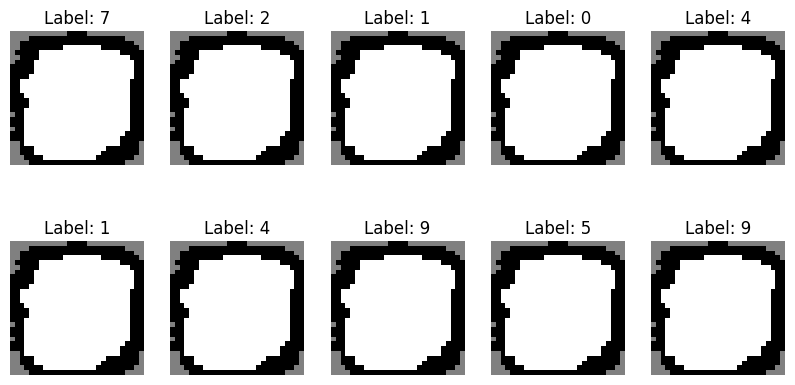

In [19]:
import matplotlib.pyplot as plt


# Get a batch of test data
data_iter = iter(test_loader)
images, labels = next(data_iter)

# Flatten and pass through the model
flattened_images = images.view(images.size(0), -1)
updated_states = model(flattened_images)

# Reshape updated states back to images
reconstructed_images = updated_states.view(-1, 28, 28)

# Plot some reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(reconstructed_images[i].detach().numpy(), cmap='gray')
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')
plt.show()

## Restricted Boltzmann Machine - RBM

### Training & Evaluation

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

class RBM(nn.Module):
    def __init__(self, num_visible, num_hidden):
        super(RBM, self).__init__()
        self.W = nn.Parameter(torch.randn(num_hidden, num_visible) * 0.01)
        self.v_bias = nn.Parameter(torch.zeros(num_visible))
        self.h_bias = nn.Parameter(torch.zeros(num_hidden))

    def sample_h(self, v):
        p_h_given_v = torch.sigmoid(F.linear(v, self.W, self.h_bias))
        return torch.bernoulli(p_h_given_v)

    def sample_v(self, h):
        p_v_given_h = torch.sigmoid(F.linear(h, self.W.t(), self.v_bias))
        return torch.bernoulli(p_v_given_h)

    def energy(self, v, h):
        vWh = torch.matmul(torch.matmul(v, self.W.t()), h.t())
        return -torch.sum(vWh) - torch.matmul(v, self.v_bias) - torch.matmul(h, self.h_bias)

    def forward(self, v, k=1):
        h = self.sample_h(v)
        for _ in range(k):
            v_recon = self.sample_v(h)
            h = self.sample_h(v_recon)
        return v_recon, h

# Hyperparameters
num_epochs = 20
k = 5  # Number of CD steps
num_visible = 784
num_hidden = 500
learning_rate = 0.0001  # Reduced learning rate
alpha = 0.01
weight_decay = 1e-5

# Data augmentation transforms
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])


# Define datasets and dataloaders
train_data = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

validation_data = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)
validation_loader = DataLoader(validation_data, batch_size=64, shuffle=False)

# Define the RBM model
model = RBM(num_visible, num_hidden)

# Define the optimizer with learning rate scheduling
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Define the loss function
def calculate_loss(v, v_recon, model, h):
    return torch.mean(model.energy(v, h) - model.energy(v_recon, h)) + alpha * torch.mean(model.energy(v, h))

# Training loop with early stopping and gradient clipping
best_val_loss = float('inf')
patience = 5
epochs_without_improvement = 0
clip_value = 5.0  # Gradient clipping value

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    with tqdm(train_loader, unit="batch") as tepoch:
        for batch_idx, (data, _) in enumerate(tepoch):
            tepoch.set_description(f"Epoch {epoch+1}")
            optimizer.zero_grad()
            data = data.view(data.size(0), -1)
            v_recon, h = model(data, k=k)

            loss = calculate_loss(data, v_recon, model, h)
            epoch_loss += loss.item()

            loss.backward()
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
            optimizer.step()
            tepoch.set_postfix(loss=loss.item())

    scheduler.step()  # Adjust learning rate

    avg_epoch_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch+1}: Average Training Loss = {avg_epoch_loss:.4f}")

    # Evaluate on validation set
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, _ in validation_loader:
            data = data.view(data.size(0), -1)
            v_recon, h = model(data, k=k)
            val_loss += calculate_loss(data, v_recon, model, h).item()
    val_loss /= len(validation_loader)
    print(f"Epoch {epoch+1}: Validation Loss = {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print("Early stopping triggered.")
            break

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# Evaluate on the test set
test_data = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

def evaluate(model, test_loader, k=1):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.view(data.size(0), -1)
            v_recon, h = model(data, k=k)
            test_loss += calculate_loss(data, v_recon, model, h).item()
    test_loss /= len(test_loader)
    print(f"Test Loss: {test_loss:.4f}")

evaluate(model, test_loader)

Epoch 1: 100%|██████████| 938/938 [01:25<00:00, 11.00batch/s, loss=-8.07e+6]


Epoch 1: Average Training Loss = -14838869.9950
Epoch 1: Validation Loss = 3549222.9510


Epoch 2: 100%|██████████| 938/938 [01:23<00:00, 11.21batch/s, loss=-1.71e+7]


Epoch 2: Average Training Loss = -50195232.7953
Epoch 2: Validation Loss = 5215057.8221


Epoch 3: 100%|██████████| 938/938 [01:23<00:00, 11.28batch/s, loss=-2.57e+7]


Epoch 3: Average Training Loss = -86555093.9701
Epoch 3: Validation Loss = 3764425.7818


Epoch 4: 100%|██████████| 938/938 [01:23<00:00, 11.24batch/s, loss=-3.41e+7]


Epoch 4: Average Training Loss = -121987078.1450
Epoch 4: Validation Loss = 1434318.1073


Epoch 5: 100%|██████████| 938/938 [01:22<00:00, 11.38batch/s, loss=-4.41e+7]


Epoch 5: Average Training Loss = -157046345.6759
Epoch 5: Validation Loss = -2092406.7801


Epoch 6: 100%|██████████| 938/938 [01:23<00:00, 11.28batch/s, loss=-5.13e+7]


Epoch 6: Average Training Loss = -192033546.2900
Epoch 6: Validation Loss = -5700181.5756


Epoch 7: 100%|██████████| 938/938 [01:23<00:00, 11.29batch/s, loss=-6.32e+7]


Epoch 7: Average Training Loss = -226938965.8550
Epoch 7: Validation Loss = -10070089.6981


Epoch 8: 100%|██████████| 938/938 [01:23<00:00, 11.25batch/s, loss=-7.18e+7]


Epoch 8: Average Training Loss = -261896264.8017
Epoch 8: Validation Loss = -14098165.6330


Epoch 9: 100%|██████████| 938/938 [01:22<00:00, 11.36batch/s, loss=-7.74e+7]


Epoch 9: Average Training Loss = -296811842.3710
Epoch 9: Validation Loss = -19275854.8292


Epoch 10: 100%|██████████| 938/938 [01:22<00:00, 11.38batch/s, loss=-8.6e+7]


Epoch 10: Average Training Loss = -331794947.7612
Epoch 10: Validation Loss = -24284747.2940


Epoch 11: 100%|██████████| 938/938 [01:22<00:00, 11.31batch/s, loss=-8.84e+7]


Epoch 11: Average Training Loss = -351008580.2559
Epoch 11: Validation Loss = -24232834.9494


Epoch 12: 100%|██████████| 938/938 [01:23<00:00, 11.24batch/s, loss=-8.92e+7]


Epoch 12: Average Training Loss = -354535778.7377
Epoch 12: Validation Loss = -24694220.5307


Epoch 13: 100%|██████████| 938/938 [01:22<00:00, 11.38batch/s, loss=-8.81e+7]


Epoch 13: Average Training Loss = -358024357.4243
Epoch 13: Validation Loss = -25097072.4253


Epoch 14: 100%|██████████| 938/938 [01:22<00:00, 11.41batch/s, loss=-9.12e+7]


Epoch 14: Average Training Loss = -361590425.0149
Epoch 14: Validation Loss = -25887068.1332


Epoch 15: 100%|██████████| 938/938 [01:23<00:00, 11.28batch/s, loss=-9.15e+7]


Epoch 15: Average Training Loss = -365030384.4094
Epoch 15: Validation Loss = -26341233.8690


Epoch 16: 100%|██████████| 938/938 [01:22<00:00, 11.33batch/s, loss=-8.87e+7]


Epoch 16: Average Training Loss = -368521284.7420
Epoch 16: Validation Loss = -26535070.0422


Epoch 17: 100%|██████████| 938/938 [01:22<00:00, 11.40batch/s, loss=-9.55e+7]


Epoch 17: Average Training Loss = -371973466.0725
Epoch 17: Validation Loss = -27045602.0226


Epoch 18: 100%|██████████| 938/938 [01:22<00:00, 11.40batch/s, loss=-9.12e+7]


Epoch 18: Average Training Loss = -375421209.4243
Epoch 18: Validation Loss = -27919845.3755


Epoch 19: 100%|██████████| 938/938 [01:23<00:00, 11.25batch/s, loss=-9.86e+7]


Epoch 19: Average Training Loss = -379040571.4200
Epoch 19: Validation Loss = -28257019.8061


Epoch 20: 100%|██████████| 938/938 [01:23<00:00, 11.27batch/s, loss=-9.68e+7]


Epoch 20: Average Training Loss = -382503878.6780
Epoch 20: Validation Loss = -28636267.7397


<ipython-input-27-ccc6ae7331d5>:137: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Test Loss: -23523435.6340
